In [1]:
import pandas as pd

In [2]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [3]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [4]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,jsc1399_2013_09_11_151245_ccs,53.232432,1.513730,16.472843,13.125832,9.211776,4.586862,4.717999,0.423318,jsc1399
1,r65_2013_11_05_151321_ccs,65.241363,0.568085,17.077749,8.466435,0.525043,-1.154399,2.564839,4.340279,r65
2,vzo106_2013_09_03_181628_ccs,75.124368,1.088074,8.690225,10.714886,0.976461,1.953822,2.136593,3.344273,vzo106
3,201424_2013_11_06_155255_ccs,65.060412,0.325963,16.035799,4.356658,3.180352,0.922792,2.183222,3.370751,201424
4,jsc1424_2013_09_16_145015_ccs,53.209684,2.204273,18.052448,9.338151,9.390636,7.743232,3.692115,1.813988,jsc1424


In [5]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [6]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [7]:
aligned_pred_PLS_SM, aligned_pred_ICA = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [8]:
aligned_pred_PLS_SM

,Sample Name,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
ID,,,,,,,,,
jsc1426_2013_09_16_151528_ccs,jsc1426,42.199475,0.179197,2.301557,43.355379,0.527079,0.839088,0.503439,0.076735
bk2_2013_08_06_184259_ccs,bk2,60.489308,0.755301,15.720130,4.656748,2.072465,4.417494,3.980115,3.591427
jsc1379_2013_09_10_142041_ccs,jsc1379,49.168257,0.786676,18.942437,8.232171,4.306825,9.502895,3.749899,0.738520
gbw07108_2013_08_07_145651_ccs,gbw07108,21.806462,0.270951,5.728554,3.124891,3.412307,32.523570,0.662775,1.007616
jsc1456_2013_09_18_160559_ccs,jsc1456,49.913846,2.535613,16.784011,10.266866,4.271121,7.532339,4.505630,1.315754
...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,gbw07105,45.254980,2.218118,14.434764,11.289847,7.481151,8.577607,3.721762,1.595640
sarm51_2013_08_29_145612_ccs,sarm51,44.691284,0.372667,9.498774,13.988716,0.850564,2.163324,0.478211,0.597297
s4_2013_11_05_155948_ccs,s4,64.085118,0.781323,18.716993,5.541663,2.257753,0.484870,0.683235,3.813765


In [9]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [10]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,45.636085,0.287854,3.884353,37.518533,3.288139,3.442411,1.762066,-0.083256,jsc1426,jsc1426_2013_09_16_151528_ccs
1,60.021904,1.001780,15.073643,5.272562,1.992789,6.407399,5.454614,3.367458,bk2,bk2_2013_08_06_184259_ccs
2,50.198205,0.527921,18.945050,9.217846,5.323048,11.236728,4.153139,0.089151,jsc1379,jsc1379_2013_09_10_142041_ccs
3,22.358075,0.172450,5.892905,2.109574,5.151600,31.510003,-0.036607,0.920635,gbw07108,gbw07108_2013_08_07_145651_ccs
4,50.237456,2.369796,16.126075,10.272760,4.125306,9.237659,4.312312,1.049643,jsc1456,jsc1456_2013_09_18_160559_ccs
...,...,...,...,...,...,...,...,...,...,...
66,44.863800,2.142910,14.573229,11.095740,8.003476,7.906802,3.141309,0.970092,gbw07105,gbw07105_2013_08_07_142727_ccs
67,47.027573,0.413006,9.625750,14.430109,-1.244659,5.938284,2.439012,-0.154213,sarm51,sarm51_2013_08_29_145612_ccs
68,60.184987,0.897092,19.090507,5.742431,2.831958,-0.998766,0.862965,4.964423,s4,s4_2013_11_05_155948_ccs
69,74.365180,0.335356,12.448340,3.865449,0.629886,-0.029471,2.983940,2.880758,gl7mt,gl7mt_2013_10_23_144551_ccs


In [11]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [12]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [13]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

In [14]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,49.072694,42.199475,jsc1426,19.3,45.636085
1,59.554499,60.489308,bk2,58.83,60.021904
2,51.228154,49.168257,jsc1379,48.93,50.198205
3,22.909688,21.806462,gbw07108,15.6,22.358075
4,50.561066,49.913846,jsc1456,49.31,50.237456


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

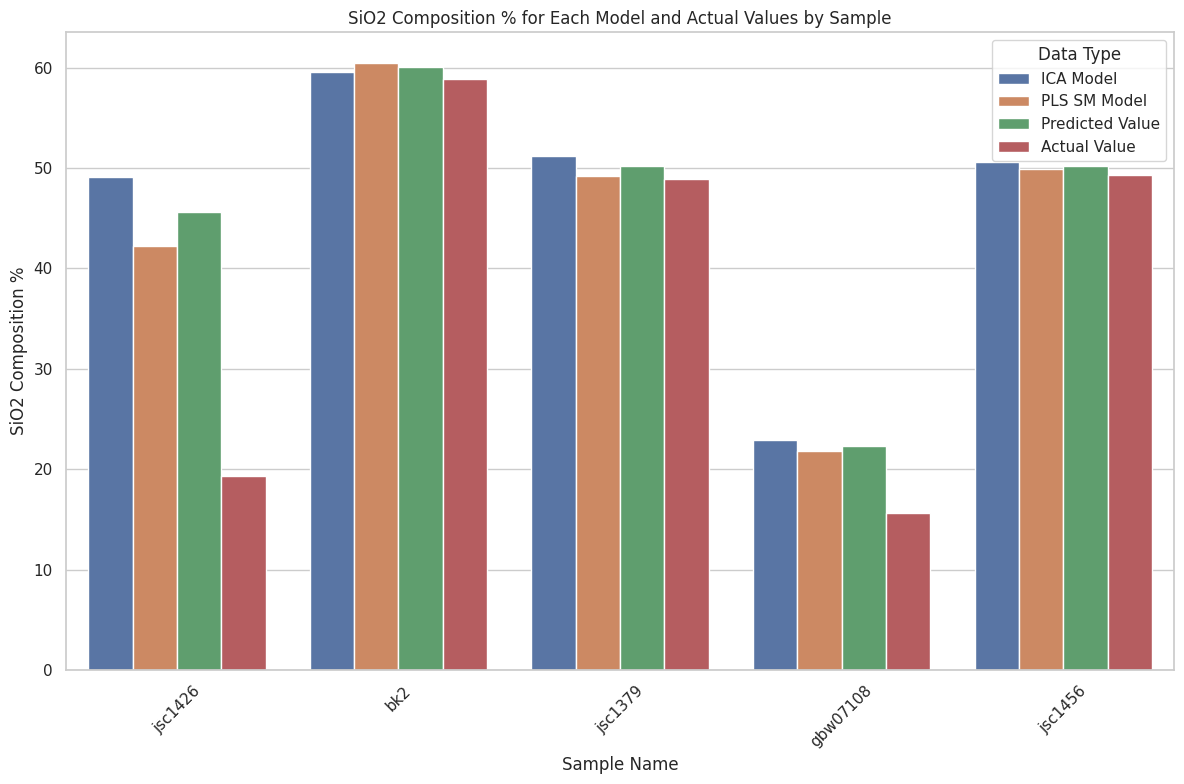

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [16]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,45.636085,19.3,0.287854,0.08,3.884353,1.49,37.518533,65.85,3.288139,0.77,3.442411,0.77,1.762066,0.45,-0.083256,0.16,jsc1426
1,60.021904,58.83,1.001780,1.94,15.073643,14.77,5.272562,7.90,1.992789,2.82,6.407399,4.64,5.454614,3.35,3.367458,3.99,bk2
2,50.198205,48.93,0.527921,0.57,18.945050,22.66,9.217846,7.67,5.323048,4.34,11.236728,9.80,4.153139,3.13,0.089151,0.45,jsc1379
3,22.358075,15.6,0.172450,0.33,5.892905,5.03,2.109574,2.27,5.151600,5.19,31.510003,35.67,-0.036607,0.08,0.920635,0.78,gbw07108
4,50.237456,49.31,2.369796,2.72,16.126075,16.46,10.272760,10.93,4.125306,3.93,9.237659,6.75,4.312312,4.58,1.049643,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,44.863800,44.64,2.142910,2.37,14.573229,13.83,11.095740,12.06,8.003476,7.77,7.906802,8.81,3.141309,3.38,0.970092,2.32,gbw07105
67,47.027573,33.81,0.413006,0.82,9.625750,11.87,14.430109,16.52,-1.244659,0.92,5.938284,0.86,2.439012,0.07,-0.154213,0.33,sarm51
68,60.184987,67.4,0.897092,0.9,19.090507,16.30,5.742431,5.14,2.831958,1.81,-0.998766,0.21,0.862965,0.81,4.964423,3.4,s4
69,74.365180,77.54,0.335356,0.33,12.448340,11.17,3.865449,2.54,0.629886,1.08,-0.029471,0.07,2.983940,2.33,2.880758,2.39,gl7mt


In [17]:
moc_rmse_values

{'SiO2': 6.512119319545472,
 'TiO2': 0.44386879600745693,
 'Al2O3': 2.060644331006897,
 'FeOT': 4.930419816137445,
 'MgO': 1.260856805243656,
 'CaO': 2.122863311496978,
 'Na2O': 0.9112958558859513,
 'K2O': 0.9746755883690121}

In [18]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squa

{'SiO2': 8.641763248691563,
 'TiO2': 0.5332166252675955,
 'Al2O3': 3.688802265738463,
 'FeOT': 7.069826840540592,
 'MgO': 2.1006761874529967,
 'CaO': 3.997354539700356,
 'Na2O': 1.4531439165327298,
 'K2O': 1.1528618107092707}

In [19]:
PLS_SM_actual_merged_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
jsc1426_2013_09_16_151528_ccs,42.199475,19.3,0.179197,0.08,2.301557,1.49,43.355379,65.85,0.527079,0.77,0.839088,0.77,0.503439,0.45,0.076735,0.16,jsc1426
bk2_2013_08_06_184259_ccs,60.489308,58.83,0.755301,1.94,15.720130,14.77,4.656748,7.90,2.072465,2.82,4.417494,4.64,3.980115,3.35,3.591427,3.99,bk2
jsc1379_2013_09_10_142041_ccs,49.168257,48.93,0.786676,0.57,18.942437,22.66,8.232171,7.67,4.306825,4.34,9.502895,9.80,3.749899,3.13,0.738520,0.45,jsc1379
gbw07108_2013_08_07_145651_ccs,21.806462,15.6,0.270951,0.33,5.728554,5.03,3.124891,2.27,3.412307,5.19,32.523570,35.67,0.662775,0.08,1.007616,0.78,gbw07108
jsc1456_2013_09_18_160559_ccs,49.913846,49.31,2.535613,2.72,16.784011,16.46,10.266866,10.93,4.271121,3.93,7.532339,6.75,4.505630,4.58,1.315754,1.82,jsc1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gbw07105_2013_08_07_142727_ccs,45.254980,44.64,2.218118,2.37,14.434764,13.83,11.289847,12.06,7.481151,7.77,8.577607,8.81,3.721762,3.38,1.595640,2.32,gbw07105
sarm51_2013_08_29_145612_ccs,44.691284,33.81,0.372667,0.82,9.498774,11.87,13.988716,16.52,0.850564,0.92,2.163324,0.86,0.478211,0.07,0.597297,0.33,sarm51
s4_2013_11_05_155948_ccs,64.085118,67.4,0.781323,0.9,18.716993,16.30,5.541663,5.14,2.257753,1.81,0.484870,0.21,0.683235,0.81,3.813765,3.4,s4
gl7mt_2013_10_23_144551_ccs,78.047873,77.54,0.370392,0.33,12.082005,11.17,3.616078,2.54,1.721568,1.08,-0.382714,0.07,2.283547,2.33,2.182839,2.39,gl7mt


In [20]:
PLS_SM_rmses

{'SiO2': 5.805351498994476,
 'TiO2': 0.4690051816126014,
 'Al2O3': 1.9363201494236817,
 'FeOT': 4.3481481215471876,
 'MgO': 1.1692590653488157,
 'CaO': 1.4347224209022647,
 'Na2O': 0.6649369478235511,
 'K2O': 0.7217516851245152}

In [21]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA (replica)", "PLS_SM (replica)", "MOC (replica)"])

In [22]:
RMSEs_df.T

,ICA (replica),PLS_SM (replica),MOC (replica)
SiO2,8.641763,5.805351,6.512119
TiO2,0.533217,0.469005,0.443869
Al2O3,3.688802,1.936320,2.060644
FeOT,7.069827,4.348148,4.930420
MgO,2.100676,1.169259,1.260857
CaO,3.997355,1.434722,2.122863
Na2O,1.453144,0.664937,0.911296
K2O,1.152862,0.721752,0.974676


In [23]:
MOC_model_rmses = {
    'SiO2': 5.83,
    'TiO2': 1.10,
    'Al2O3': 3.18,
    'FeOT': 2.90,
    'MgO': 2.30,
    'CaO': 1.14,
    'Na2O': 1.34,
    'K2O': 1.49
 }

ICA_original_rmses = {
    'SiO2': 8.31,
    'TiO2': 1.44,
    'Al2O3': 4.77,
    'FeOT': 5.17,
    'MgO': 4.08,
    'CaO': 3.07,
    'Na2O': 2.29,
    'K2O': 0.98
 }

PLS_SM_original_rmses = {
    'SiO2': 4.33,
    'TiO2': 0.94,
    'Al2O3': 2.85,
    'FeOT': 2.01,
    'MgO': 1.06,
    'CaO': 2.65,
    'Na2O': 0.62,
    'K2O': 0.72
 }

In [24]:
R_df = RMSEs_df.T
R_df['MOC (original)'] = MOC_model_rmses.values()
R_df['ICA (original)'] = ICA_original_rmses.values()
R_df['PLS_SM (original)'] = PLS_SM_original_rmses.values()

In [25]:
R_df
# R_df.to_csv("eval.csv")

,ICA (replica),PLS_SM (replica),MOC (replica),MOC (original),ICA (original),PLS_SM (original)
SiO2,8.641763,5.805351,6.512119,5.83,8.31,4.33
TiO2,0.533217,0.469005,0.443869,1.10,1.44,0.94
Al2O3,3.688802,1.936320,2.060644,3.18,4.77,2.85
FeOT,7.069827,4.348148,4.930420,2.90,5.17,2.01
MgO,2.100676,1.169259,1.260857,2.30,4.08,1.06
CaO,3.997355,1.434722,2.122863,1.14,3.07,2.65
Na2O,1.453144,0.664937,0.911296,1.34,2.29,0.62
K2O,1.152862,0.721752,0.974676,1.49,0.98,0.72


/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/christian/projects/p9/baseline/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

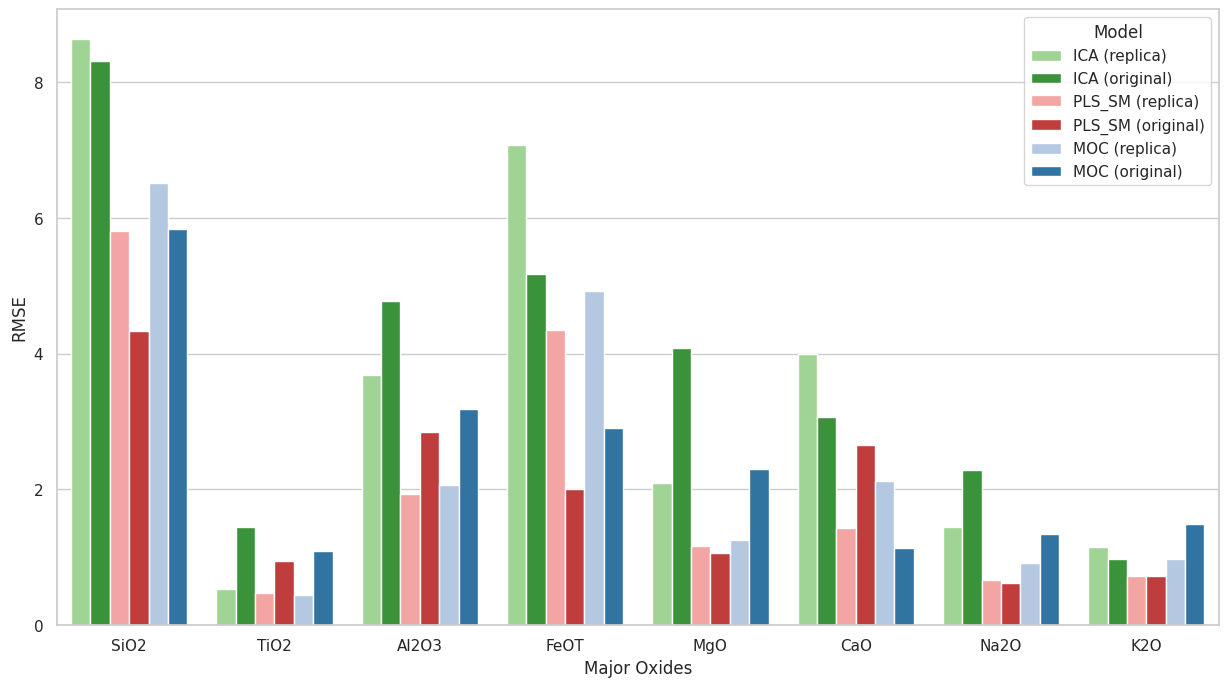

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reordering columns to alternate between replica and original
column_order = ['ICA (replica)', 'ICA (original)', 'PLS_SM (replica)', 'PLS_SM (original)', 'MOC (replica)', 'MOC (original)']
R_df = R_df[column_order]

# Melting the DataFrame
R_df_melted = R_df.reset_index().melt(id_vars='index')
R_df_melted.columns = ['Major Oxides', 'Model', 'RMSE']

# Setting Seaborn style
sns.set(style="whitegrid")

# Define a more balanced color palette
palette = {
    'MOC (original)': '#1f77b4',  # Slightly darker blue
    'ICA (original)': '#2ca02c',  # Slightly darker green
    'PLS_SM (original)': '#d62728',  # Slightly darker red
    'MOC (replica)': '#aec7e8',  # Lighter blue
    'ICA (replica)': '#98df8a',  # Lighter green
    'PLS_SM (replica)': '#ff9896'  # Lighter red
}

# Creating the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Major Oxides', y='RMSE', hue='Model', data=R_df_melted, palette=palette)

# Adding labels and title
ax.set_xlabel('Major Oxides')
ax.set_ylabel('RMSE')
# ax.set_title('Grouped Histogram for Major Oxides')

# Adjust legend
plt.legend(title='Model')

# Display the plot
plt.show()


In [34]:
import numpy as np
np.around(np.array(list(moc_rmse_values.values())), 2)

array([6.51, 0.44, 2.06, 4.93, 1.26, 2.12, 0.91, 0.97])